# Self-Driving Car Engineer Nanodegree
## Project: Finding Lane Lines on the Road

By: Santiago Hurtado

In [1]:
## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

## Functions

In [3]:
def pre_process(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    threshold = cv2.inRange(hsv,low_boundary,high_boundary)    
    return cv2.GaussianBlur(threshold, (kernel_size, kernel_size), 0)

def get_interest_region(img,processed_image):
    edges = cv2.Canny(img, low_threshold, high_threshold)
    mask = np.zeros_like(processed_image)   
    # This time we are defining a four sided polygon to mask
    imshape = img.shape
    vertices = np.array([[(50,imshape[0]),(400, 350), (imshape[1]-400, 350), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    return cv2.bitwise_and(edges,mask)

def anotated_image(img,read_img):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
    draw_lines(read_img, lines,thickness=8)    
    return read_img

def read_image(path):
    return mpimg.imread(path)

def draw_lines(img, lines, color=[255, 0, 0], thickness=4):
    # separate lines
    positive_slope = []
    negative_slope = []
    low_y=img.shape[0]
    for l in lines:
        for x1,y1,x2,y2 in l:
            slope =slope = ((y2-y1)/(x2-x1))
            intercept=y1-slope*x1
            if slope > 0:
                positive_slope.append((slope,intercept))
            elif slope < 0:
                negative_slope.append((slope,intercept))
            pass
        pass
    pass
    #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    # average 
    if len(positive_slope) > 0:
        average_positive_slope = sum(i for i,j in positive_slope)/len(positive_slope)
        average_positive_intercept = sum(j for i,j in positive_slope)/len(positive_slope)
        if average_positive_intercept != float("inf") and average_positive_slope!=float("inf"):
            low_x=int((low_y-average_positive_intercept)/average_positive_slope)
            high_x=int((high_y-average_positive_intercept)/average_positive_slope)
            cv2.line(img, (low_x, low_y), (high_x, high_y), color, thickness)
    
    if len(negative_slope)>0:
        average_negative_slope = sum(i for i,j in negative_slope)/len(negative_slope)
        average_negative_intercept = sum(j for i,j in negative_slope)/len(negative_slope)
        if average_negative_intercept != float("inf") and average_negative_slope!=float("inf"):
            low_x=int((low_y-average_negative_intercept)/average_negative_slope)
            high_x=int((high_y-average_negative_intercept)/average_negative_slope)
            cv2.line(img, (low_x, low_y), (high_x, high_y), color, thickness)
    # y = m*x+b or x=(y-b)/m
    pass

## Pipeline Definition

In [4]:
def process_image(path):
    image = read_image(path)
    pre_processed_img = pre_process(image)
    interested_region = get_interest_region(image,pre_processed_img)
    return anotated_image(interested_region,image)

## Parameters to be configured

In [5]:
kernel_size = 5
low_threshold = 50
high_threshold = 150
rho = 2
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 2
ignore_mask_color = 255   
low_boundary=(0,0,200)
high_boundary=(255,150,255)
# used to set the top boundary mask
high_y=350

# Process a single image
## Show Original Image

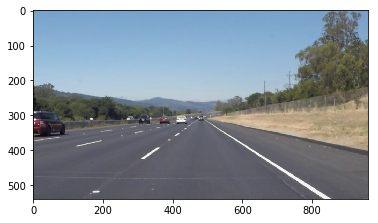

In [6]:
i = 'test_images/solidWhiteRight.jpg'
plt.imshow(read_image(i))

## Show finded Lines

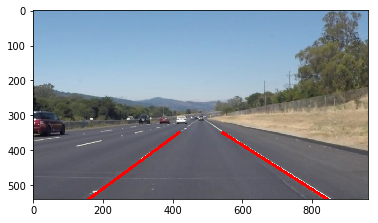

In [7]:
plt.imshow(process_image(i))

## Process All Test Images

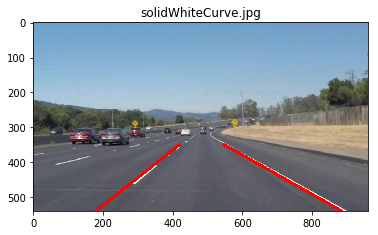

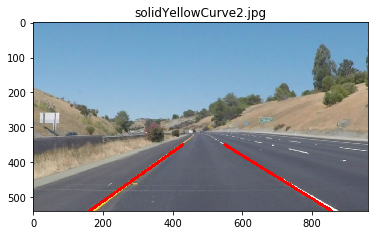

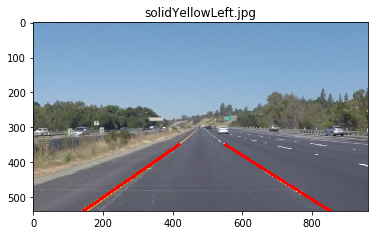

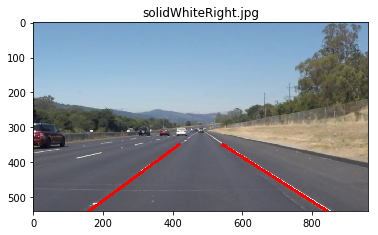

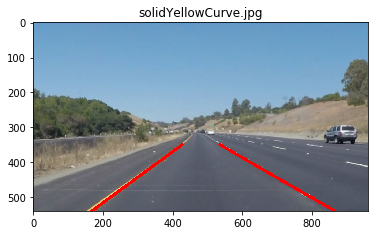

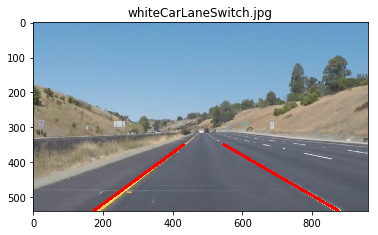

In [8]:
import os
path = 'test_images/'
for i in os.listdir(path):
    plt.figure()
    plt.title(i)
    result = process_image(path+i)
    plt.imshow(result)

## Process Videos

In [9]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [10]:
def process_frame(frame):
    pre_processed_img = pre_process(frame)
    interested_region = get_interest_region(frame,pre_processed_img)
    return anotated_image(interested_region,frame)

## Solid White Line Video

In [11]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_frame)
%time white_clip.write_videofile(white_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:02<00:00, 80.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 5.41 s, sys: 464 ms, total: 5.88 s
Wall time: 3.04 s


## Solid Yellow Line Video

In [12]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_frame)
%time yellow_clip.write_videofile(yellow_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:09<00:00, 74.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 17.3 s, sys: 1.34 s, total: 18.6 s
Wall time: 9.34 s
